In [2]:
import time
import datetime
import copy
import numpy as np
import math

import pandas as pd
import json
from bson.json_util import dumps
import matplotlib.pyplot as plt

In [3]:
from fastparquet import ParquetFile,write

In [240]:
pf = ParquetFile('do512_10-3-2019-10-3-2018.parquet')
gdf = pf.to_pandas(index=False)
df['artists']=gdf.artists.values

In [99]:
df=pd.read_csv('fullevents_proc_tickets_art.csv',index_col=0)

In [103]:
df=pd.read_csv('event_votes.csv')

In [104]:
df.columns

Index(['id', 'votes'], dtype='object')

In [105]:
len(df)

41865

In [17]:
df.head()

,presented_by,title,category,begin_time,past,end_time,votes,is_eventbrite,amazon_affiliate,eventbrite_id,...,venue.longitude,venue.popularity,venue.address,venue.city,venue.state,venue.zip,ticket_allages,ticket_price_low,ticket_price_max,min_age
id,,,,,,,,,,,,,,,,,,,,,
11049447,Official 2019 ACL Fest Late Night Show:,Gary Clark Jr,Music,2019-10-03T19:00:00-05:00,False,NaN,784,False,True,NaN,...,-97.736175,15.0,801 Red River,Austin,TX,78701,True,0.0,0.0,NaN
11049456,Official 2019 ACL Fest Late Night Show:,Hippie Sabotage w/ Sebastian Paul,Music,2019-10-03T20:00:00-05:00,False,NaN,223,False,True,NaN,...,-97.728516,15.0,2015 E. Riverside Dr.,Austin,TX,78741,False,0.0,0.0,18.0
11049430,Official 2019 ACL Fest Late Night Show:,FIDLAR w/ XETAS,Music,2019-10-03T18:30:00-05:00,False,NaN,163,False,True,NaN,...,-97.729386,15.0,1308 E. Fourth,Austin,TX,78702,True,0.0,0.0,NaN
11186444,Misfits Comedy Presents,That Joke's New! Comedy Open-Mic,Comedy,2019-10-03T20:00:00-05:00,False,NaN,151,False,True,NaN,...,NaN,1.0,1905 Aldrich St.,Austin,TX,NaN,False,0.0,0.0,NaN
11141496,NaN,Hear Me Bitch 90’s Birthday Bash Comedy Show,Comedy,2019-10-03T19:30:00-05:00,False,NaN,126,True,True,7.302293e+10,...,-97.745230,1.0,616 Lavaca St,Austin,TX,78701,False,10.0,12.0,NaN


In [241]:
# get artist column andef
e_artist=df.artists.values

In [242]:
#get artist_popularity
p_art_avg=[]
p_art_sum=[]
p_art_max=[]
for i,item in enumerate(e_artist):
    #print(i)
    if len(item)==0:
        p_art_sum+=[0]
        p_art_avg+=[0]
        p_art_max+=[0]
    elif len(item)==1:
        p_art_sum+=[json.loads(dumps(item))[0]['popularity']]
        p_art_avg+=[json.loads(dumps(item))[0]['popularity']]
        p_art_max+=[json.loads(dumps(item))[0]['popularity']]
    else:
        subsum=0
        partmax=0
        for sub in item:
            part=json.loads(dumps(item))[0]['popularity']
            subsum+=part
            if part> partmax: partmax=part
        p_art_sum+=[subsum]
        p_art_avg+=[subsum/len(item)]
        p_art_max+=[partmax]

In [243]:
# place the artist popularity back to df
df['artist.popularity.sum']=p_art_sum
df['artist.popularity.avg']=p_art_avg
df['artist.popularity.max']=p_art_max

In [102]:
df.columns

Index(['presented_by', 'title', 'category', 'begin_time', 'past', 'end_time',
       'votes', 'is_eventbrite', 'amazon_affiliate', 'eventbrite_id',
       'is_free', 'rating', 'doors', 'popularity', 'sold_out', 'favorite',
       'artists', 'rsvp', 'eager', 'venue.id', 'venue.title', 'venue.latitude',
       'venue.longitude', 'venue.popularity', 'venue.address', 'venue.city',
       'venue.state', 'venue.zip', 'ticket_allages', 'ticket_price_low',
       'ticket_price_max', 'min_age'],
      dtype='object')

In [244]:
usecols=['category', 'begin_time', 'past',
       'votes', 'is_eventbrite','is_free', 'rating', 'doors',
       'sold_out','favorite', 'artists','venue.id','venue.popularity','venue.zip',
       'ticket_allages','ticket_price_low', 'ticket_price_max', 'min_age',
       'artist.popularity.sum', 'artist.popularity.avg',
       'artist.popularity.max']

In [245]:
udf = df[usecols]

In [95]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41865 entries, 11049447 to 9968570
Data columns (total 23 columns):
category                 41865 non-null int64
past                     41865 non-null int32
votes                    41865 non-null int64
is_eventbrite            41865 non-null int32
is_free                  41865 non-null int32
doors                    41865 non-null int32
sold_out                 41865 non-null int32
venue.id                 41865 non-null int64
venue.popularity         41865 non-null float64
venue.zip                41865 non-null int64
ticket_allages           41865 non-null int32
ticket_price_low         41865 non-null float64
ticket_price_max         41865 non-null float64
min_age                  41865 non-null int32
artist.popularity.sum    41865 non-null float64
artist.popularity.avg    41865 non-null float64
artist.popularity.max    41865 non-null float64
dow                      41865 non-null int64
doy                      41865 non-null in

In [246]:
udf.loc[:,'begin_time']=pd.to_datetime(udf.begin_time,utc=True).dt.tz_convert('America/North_Dakota/Center')

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [247]:
# tweek the start time into day of w/...ect
udf['dow']=udf.begin_time.dt.dayofweek
udf['doy']=udf.begin_time.dt.dayofyear
udf['month']=udf.begin_time.dt.month
udf['day']=udf.begin_time.dt.day
udf['hour']=udf.begin_time.dt.hour

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be

In [265]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41865 entries, 11049447 to 9968570
Data columns (total 23 columns):
category                 41865 non-null object
past                     41865 non-null int32
votes                    41865 non-null int64
is_eventbrite            41865 non-null int32
is_free                  41865 non-null int32
doors                    41865 non-null int32
sold_out                 41865 non-null int32
venue.id                 41865 non-null int64
venue.popularity         41865 non-null float64
venue.zip                41865 non-null int64
ticket_allages           41865 non-null int32
ticket_price_low         41865 non-null float64
ticket_price_max         41865 non-null float64
min_age                  41865 non-null int32
artist.popularity.sum    41865 non-null float64
artist.popularity.avg    41865 non-null float64
artist.popularity.max    41865 non-null float64
dow                      41865 non-null int64
doy                      41865 non-null i

In [249]:
# clean up some
udf.drop('begin_time', axis=1, inplace=True)
udf.drop('rating', axis=1, inplace=True)
udf.drop('favorite', axis=1, inplace=True)
udf.drop('artists', axis=1, inplace=True)

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [189]:
for item in udf.columns:
    print(udf[item].describe())

count      41865
unique        20
top       Music 
freq       17882
Name: category, dtype: object
count    41865.000000
mean         0.997850
std          0.046316
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: past, dtype: float64
count    41865.000000
mean        18.207142
std        154.928580
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       9120.000000
Name: votes, dtype: float64
count    41865.000000
mean         0.044715
std          0.206680
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_eventbrite, dtype: float64
count    41865.000000
mean         0.239197
std          0.426599
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_free, dtype: float64
count    41865.000000
mean         0.103810
std          0.305017
min        

In [266]:
udf.isnull().sum()

category                 0
past                     0
votes                    0
is_eventbrite            0
is_free                  0
doors                    0
sold_out                 0
venue.id                 0
venue.popularity         0
venue.zip                0
ticket_allages           0
ticket_price_low         0
ticket_price_max         0
min_age                  0
artist.popularity.sum    0
artist.popularity.avg    0
artist.popularity.max    0
dow                      0
doy                      0
month                    0
day                      0
hour                     0
venue.tol_num_events     0
dtype: int64

In [251]:
udf.is_eventbrite=udf.is_eventbrite.fillna(False)

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [168]:
udf.sold_out.value_counts()

False    41634
True       231
Name: sold_out, dtype: int64

In [91]:
udf.favorite.value_counts()

False    28508
Name: favorite, dtype: int64

In [113]:
udf['venue.id'].value_counts()

284358    613
611       518
607       415
9491      409
1350      399
1607      370
119       337
19704     332
317       324
87        322
268172    320
2625      314
496       310
251731    310
151       275
697       264
401587    261
113       247
1245      230
355136    229
286434    221
9128      220
393210    208
419621    199
372921    196
620       188
24861     180
379106    176
198       173
382314    165
         ... 
394932      1
4085        1
442211      1
23875       1
284654      1
432102      1
417759      1
425947      1
419800      1
405425      1
311203      1
448414      1
419736      1
433550      1
442243      1
396377      1
450176      1
450399      1
124004      1
1812        1
449731      1
437453      1
441770      1
292102      1
24303       1
413421      1
438843      1
439771      1
401064      1
8825        1
Name: venue.id, Length: 2267, dtype: int64

In [252]:
# feed the total number of events happend on the venue
vids=list(udf['venue.id'].value_counts().index.values)
vects=udf['venue.id'].value_counts().values

In [253]:
maxvects=[]
for venues in udf['venue.id'].values:
    # do lookup
    maxvects+=[vects[vids.index(venues)]]

In [254]:
udf['venue.tol_num_events']=maxvects

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [257]:
#parse zipcode to be correctly formatted
udf['venue.zip'].fillna(0,inplace=True)
aa=[ x[0:5] if x!=0 else x for x in udf['venue.zip'].values]
p=[ int(x) if x!='' else 0 for x in aa]
udf['venue.zip']=p

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [256]:
aa[30004]=''

In [258]:
udf['min_age'].value_counts()

21.0     4530
18.0     1063
13.0       23
65.0       15
15.0       11
16.0       10
10.0        6
6.0         5
75.0        4
250.0       4
17.0        4
12.0        4
25.0        2
60.0        2
33.0        2
19.0        2
20.0        2
50.0        1
40.0        1
14.0        1
100.0       1
9.0         1
500.0       1
5.0         1
2.0         1
59.0        1
29.0        1
Name: min_age, dtype: int64

In [259]:
udf['min_age'] = udf.min_age.apply(lambda x: 0.0 if x >25 else x)

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [260]:
udf['min_age'] = udf.min_age.fillna(0)

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [261]:
udf['min_age'] = udf.min_age.astype(int)

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [262]:
udf['ticket_price_max'] = udf['ticket_price_max'].fillna(0)

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [263]:
# encode some boolean features to 0/1
boolcol = udf.columns[(udf.dtypes.values == np.dtype('bool'))]

In [264]:
## convert all boolean columns into 0/1
for cols in boolcol:
    udf[cols]=udf[cols].astype(int)

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [201]:
# convert category to encoded
cat=udf.category.unique()

In [202]:
catmaping=dict(zip(cat,[x for x in range(len(cat))]))

In [203]:
print("the mapping of category is:",catmaping)

the mapping of category is: {'Music ': 0, 'Comedy': 1, 'Happy Hour + Drink Specials': 2, "DJ's + Parties": 3, 'Film + TV': 4, 'Karaoke + Trivia': 5, 'Workshops + Classes': 6, 'Community': 7, 'Literary': 8, 'Art & Culture': 9, 'Sports + Activities': 10, 'Food + Drink': 11, 'LGBTQ+': 12, 'Theater': 13, 'Variety / Other': 14, 'Activism': 15, 'Exhibit': 16, 'Opening': 17, 'Fashion': 18, 'Free Week': 19}


In [267]:
for i,line in enumerate(cat):
    udf.category.replace(line,i,inplace=True)

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [268]:
udf.category.value_counts()

0     17882
7      5196
14     4041
4      3718
9      1953
11     1925
1      1592
10     1471
2      1129
8       744
3       716
13      637
5       438
6       157
12       95
16       69
17       64
15       34
18        2
19        2
Name: category, dtype: int64

In [108]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41865 entries, 11049447 to 9968570
Data columns (total 24 columns):
category                 41865 non-null int64
past                     41865 non-null int32
votes                    41865 non-null int64
is_eventbrite            41865 non-null int32
is_free                  41865 non-null int32
doors                    41865 non-null int32
sold_out                 41865 non-null int32
venue.id                 41865 non-null int64
venue.popularity         41865 non-null float64
venue.zip                41865 non-null int64
ticket_allages           41865 non-null int32
ticket_price_low         41865 non-null float64
ticket_price_max         41865 non-null float64
min_age                  41865 non-null int32
artist.popularity.sum    41865 non-null float64
artist.popularity.avg    41865 non-null float64
artist.popularity.max    41865 non-null float64
dow                      41865 non-null int64
doy                      41865 non-null in

In [125]:
udf['event_id']=df['id'].values

In [127]:
## save out this dataframe
write('full_1st_setoffeat_events4mlwithid.parq',udf)

In [271]:
udf.to_csv('full_1st_setoffeat_events4ml.csv',index=False)

In [128]:
pf=ParquetFile('full_1st_setoffeat_events4mlwithid.parq')
udf=pf.to_pandas()

In [129]:
udf.drop_duplicates(subset='event_id',inplace=True)

In [135]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40703 entries, 11049447 to 9968570
Data columns (total 23 columns):
category                 40703 non-null int64
past                     40703 non-null int32
votes                    40703 non-null int64
is_eventbrite            40703 non-null int32
is_free                  40703 non-null int32
doors                    40703 non-null int32
sold_out                 40703 non-null int32
venue.id                 40703 non-null int64
venue.popularity         40703 non-null float64
venue.zip                40703 non-null int64
ticket_allages           40703 non-null int32
ticket_price_low         40703 non-null float64
ticket_price_max         40703 non-null float64
min_age                  40703 non-null int32
artist.popularity.sum    40703 non-null float64
artist.popularity.avg    40703 non-null float64
artist.popularity.max    40703 non-null float64
dow                      40703 non-null int64
doy                      40703 non-null in

In [134]:
udf=udf.drop(['event_id'], axis=1)

In [136]:
udf_y=udf['votes'] # data y--target
a=list(udf.columns.values)
a.remove('votes')    
udf_x=udf[a]       # data X

In [137]:
## start Modeling trail
## bechmark model metric setup
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(udf_x, udf_y, test_size=0.3, random_state=12)

In [42]:
X_train.head()

,category,past,is_eventbrite,is_free,doors,sold_out,venue.id,venue.popularity,venue.zip,ticket_allages,...,min_age,artist.popularity.sum,artist.popularity.avg,artist.popularity.max,dow,doy,month,day,hour,venue.tol_num_events
id,,,,,,,,,,,,,,,,,,,,,
10499171,0,1,0,0,1,0,251731,15.0,78701,0,...,0,6.0,1.0,1.0,3,73,3,14,19,405
10108239,2,1,0,0,0,0,268909,1.0,78704,0,...,21,0.0,0.0,0.0,5,321,11,17,14,213
10630753,11,1,0,0,0,0,377356,1.0,78745,0,...,0,0.0,0.0,0.0,5,131,5,11,18,40
10191244,4,1,0,0,0,0,1607,5.0,78701,0,...,0,0.0,0.0,0.0,3,24,1,24,19,608
10758130,0,1,0,0,1,0,13466,10.0,0,0,...,21,12.0,3.0,3.0,4,158,6,7,21,197


In [13]:
# get average value as benchmark guess
b_y=np.mean(y_train)

In [14]:
b_y

17.70810441904112

In [15]:
b_pred_y = [b_y for x in range(len(y_train)) ]

In [24]:
# access the benchmark y_pred
from sklearn import metrics
print('MSE score(training):',metrics.mean_squared_error(y_train, b_pred_y))
print('MAE score(training):',metrics.mean_absolute_error(y_train, b_pred_y))
#print('MSE score:',metrics.mean_squared_error(y_test, pred_test))
#print('MAE score:',metrics.mean_absolute_error(y_test, pred_test))

NameError: name 'b_pred_y' is not defined

In [3]:
## linear regression model
from sklearn import linear_model
RD_model0 = linear_model.LinearRegression()

In [294]:
RD_model0.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [295]:
pred_train = RD_model0.predict(X_train)
print('training score of Linear Regression:',RD_model0.score(X_train,pred_train))
pred_test=RD_model0.predict(X_test)
print('testing score of Linear Regression:',RD_model0.score(X_test,pred_test))

training score of Linear Regression: 1.0
testing score of Linear Regression: 1.0


In [296]:
print('MSE score(training):',metrics.mean_squared_error(y_train, pred_train))
print('MAE score(training):',metrics.mean_absolute_error(y_train, pred_train))
print('MSE score:',metrics.mean_squared_error(y_test, pred_test))
print('MAE score:',metrics.mean_absolute_error(y_test, pred_test))

MSE score(training): 12236.203835458093
MAE score(training): 22.304912397013773
MSE score: 14145.953375424535
MAE score: 23.85615334949573


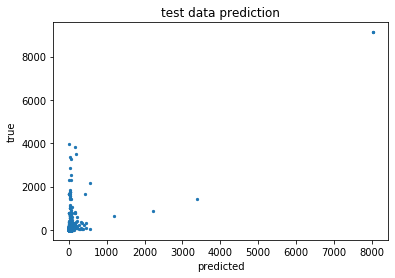

In [297]:
# plot prediction result:
import matplotlib.pyplot as plt
plt.scatter(pred_test,y_test, s=5)
plt.title('test data prediction')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

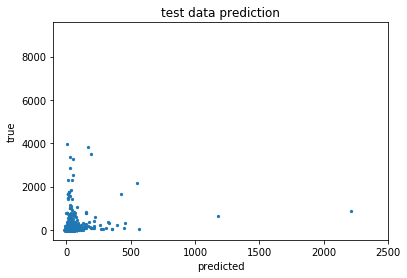

In [308]:
# plot prediction result:
import matplotlib.pyplot as plt
plt.scatter(pred_test,y_test, s=5)
plt.title('test data prediction')
plt.xlabel('predicted')
plt.ylabel('true')
plt.xlim([-100,2500])
plt.show()

In [298]:
## save a defaultdict for the coef of each attribute:
weights=zip(list(udf_x.columns),RD_model0.coef_) # use a iterable to print the coefficient and their corresponding column name
m0_coef=dict(zip(udf_x.columns, RD_model0.coef_))

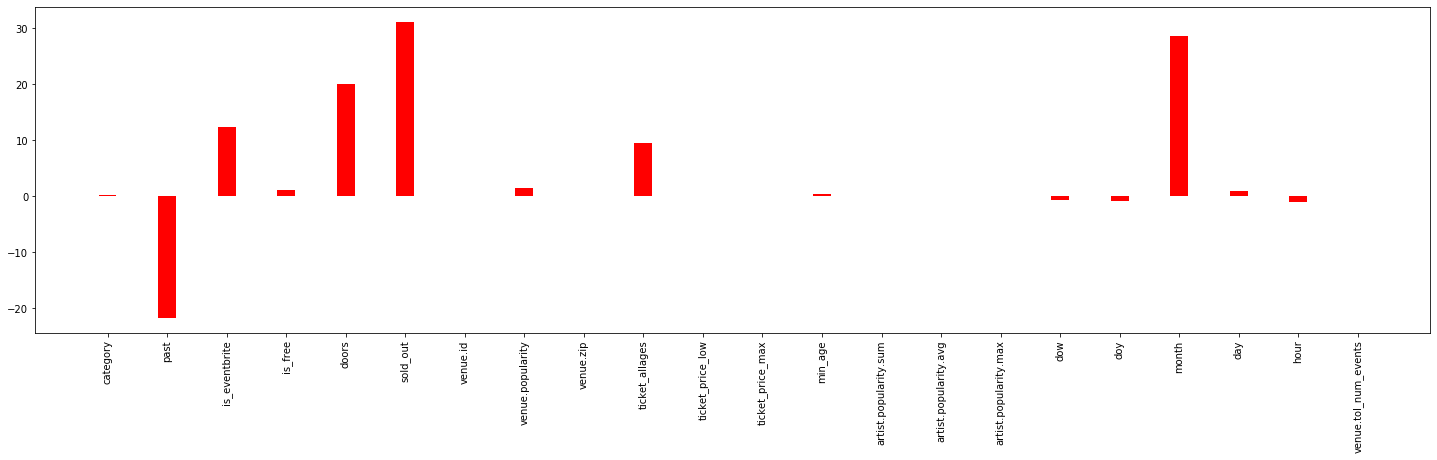

In [299]:
# plot a histogram chart to illustrate :

x_tick_label=list(udf_x.columns)
hist_val=RD_model0.coef_
fig, ax = plt.subplots(figsize=(25,6))
index=np.arange(len(RD_model0.coef_))
ax.bar(index,hist_val, .3, color='r')
ax.set_xticks(range(0, 22, 1))
ax.set_xticklabels(x_tick_label, rotation='vertical')
plt.show()


In [138]:
# try random forest model to access better interpretation to features
from sklearn.ensemble import RandomForestRegressor
RF_model0 = RandomForestRegressor(random_state=12,verbose=10)

In [139]:
RF_model0.fit(X_train,y_train)

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s remaining:    0.0s


building tree 6 of 10
building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.4s remaining:    0.0s


building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=12, verbose=10,
                      warm_start=False)

In [140]:
pred_train_RF = RF_model0.predict(X_train)
print('training score of RandomForest:',RF_model0.score(X_train,pred_train_RF))
pred_test_RF = RF_model0.predict(X_test)
print('test score of RandomForest:',RF_model0.score(X_test,pred_test_RF))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elap

training score of RandomForest: 1.0
test score of RandomForest: 1.0


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

In [141]:
# access several benchmark RMSE for reference:
print('MSE score(training):',metrics.mean_squared_error(y_train, pred_train_RF))
print('MAE score(training):',metrics.mean_absolute_error(y_train, pred_train_RF))
print('MSE score:',metrics.mean_squared_error(y_test, pred_test_RF))
print('MAE score:',metrics.mean_absolute_error(y_test, pred_test_RF))

MSE score(training): 3095.3037061729397
MAE score(training): 5.68160004095442
MSE score: 12423.17218299971
MAE score: 15.17233912514367


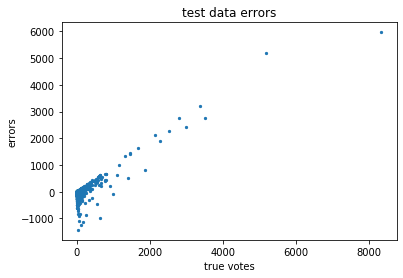

In [144]:
# plot erros  ### take a look at the errors distributions
test_err=y_test-pred_test_RF
plt.scatter(y_test,test_err, s=5)
plt.title('test data errors')
plt.xlabel('true votes')
plt.ylabel('errors')
#plt.xlim([-100,2500])
plt.show()

### the error is very large for the high value votes
#### Model will be biased on the low value votes for prediction

In [62]:
np.mean(abs(y_test.values-pred_test_RF))

15.808106849224979

In [74]:
k=[y_test>0]
yy_test=y_test.values[k]
yy_test_RF=list(pred_test_RF)[k]


C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


In [75]:
type(pred_test_RF)

numpy.ndarray

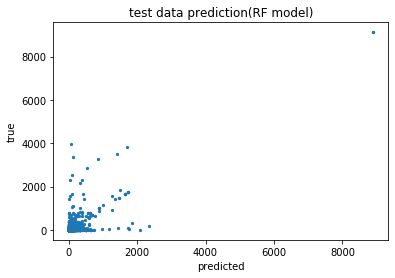

In [304]:
# plot prediction result:
plt.scatter(pred_test_RF,y_test, s=5)
plt.title('test data prediction(RF model)')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

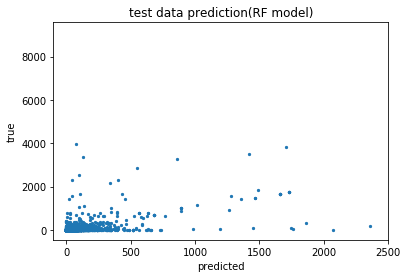

In [307]:
# plot prediction result:
plt.scatter(pred_test_RF,y_test, s=5)
plt.title('test data prediction(RF model)')
plt.xlabel('predicted')
plt.ylabel('true')
plt.xlim([-100,2500])
plt.show()

category 0.009113947576519333
past 0.0006491563920628024
is_eventbrite 0.0010575755789626706
is_free 0.004606397770256743
doors 0.0025609565121571046
sold_out 0.007299007690346053
venue.id 0.09347906333860949
venue.popularity 0.005659648298041423
venue.zip 0.030542089045742533
ticket_allages 0.003758830304267033
ticket_price_low 0.006927630350190267
ticket_price_max 0.006263887489126464
min_age 0.006267206079629972
artist.popularity.sum 0.5283956533172027
artist.popularity.avg 0.0169481569489884
artist.popularity.max 0.01559235964778902
dow 0.026239094533534107
doy 0.06508502823651886
month 0.012944831272968754
day 0.0360881442045176
hour 0.06436372016983609
venue.tol_num_events 0.056157615242732536


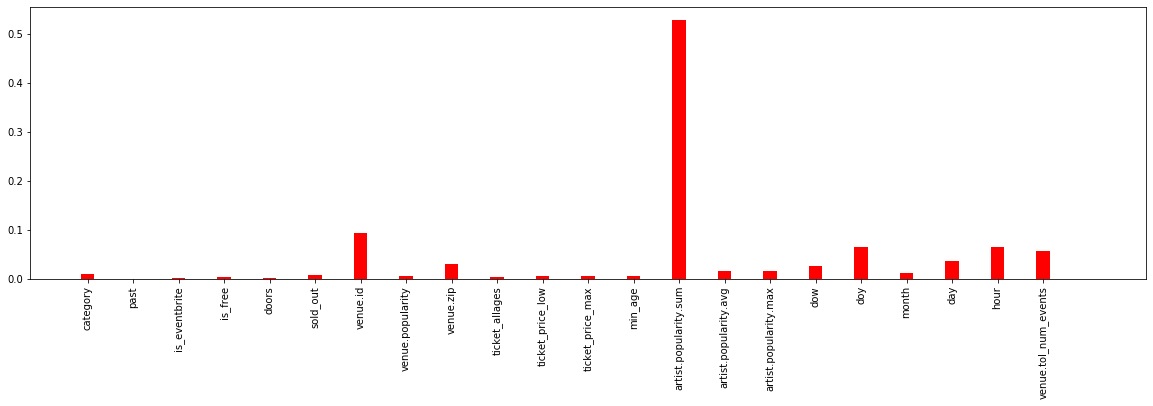

In [314]:
# Take a look at feature importance
f_importance = pd.DataFrame({'feature':udf_x.columns, 'importance':RF_model0.feature_importances_})
#plot histogram
lenc = len(udf.columns)
x_tick_label=[None]*lenc
hist_val=np.zeros(lenc)
for i in range(0,lenc-1):
    hist_val[i] = f_importance.values[i][1]
    x_tick_label[i] = f_importance.values[i][0]
    print(x_tick_label[i],hist_val[i])
    
index = np.arange(lenc)+1
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(index,hist_val, .3, color='r')
ax.set_xticks(range(1, lenc, 1))
ax.set_xticklabels(x_tick_label, rotation='vertical')
plt.show()

In [317]:
# pickout the top few features and redo linear
for i in range(0,lenc-1):
    hist_val[i] = f_importance.values[i][1]
    x_tick_label[i] = f_importance.values[i][0]
    if hist_val[i]>0.03:
        print(x_tick_label[i],hist_val[i])

venue.id 0.09347906333860949
venue.zip 0.030542089045742533
artist.popularity.sum 0.5283956533172027
doy 0.06508502823651886
day 0.0360881442045176
hour 0.06436372016983609
venue.tol_num_events 0.056157615242732536


In [318]:
usecols2=['category','venue.id','venue.zip','artist.popularity.sum','doy','day','hour','venue.tol_num_events']

In [319]:
uudf=udf[usecols2]

In [322]:
udf_y=udf['votes'] # data y--target    
uudf_x=uudf       # data X

In [328]:
## start Modeling trail
## bechmark model metric setup
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(uudf_x, udf_y, test_size=0.3, random_state=12)

In [329]:
RD_model1 = linear_model.LinearRegression()

In [330]:
RD_model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [336]:
pred_train1 = RD_model1.predict(X_train)
print('training score of Linear Regression:',RD_model1.score(X_train,pred_train1))
pred_test1=RD_model1.predict(X_test)
print('testing score of Linear Regression:',RD_model1.score(X_test,pred_test1))

training score of Linear Regression: 1.0
testing score of Linear Regression: 1.0


In [337]:
print('MSE score(training):',metrics.mean_squared_error(y_train, pred_train1))
print('MAE score(training):',metrics.mean_absolute_error(y_train, pred_train1))
print('MSE score:',metrics.mean_squared_error(y_test, pred_test1))
print('MAE score:',metrics.mean_absolute_error(y_test, pred_test1))

MSE score(training): 12373.631426323678
MAE score(training): 23.06165250390011
MSE score: 14289.713956326825
MAE score: 24.370494942771874


In [5]:
SGD_model0 = linear_model.SGDRegressor()

In [17]:
SGD_model0.fit(X_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

#### plug in another unseen event to test prediction
{
    "_id" : ObjectId("5d8c9a30552e8c8c9c358d75"),
    "event_id" : "11129071",
    "title" : "cozymason",
    "venue" : {
        "address" : "801 Red River",
        "city" : "Austin",
        "state" : "TX",
        "zip" : "78701",
        "title" : "Stubb's",
        "location" : {
            "type" : "Point",
            "coordinates" : {
                "latitude" : 30.2684579,
                "longitude" : -97.7361748
            }
        }
    },
    "begin_time" : ISODate("2019-09-27T03:00:00.000Z"),
    "end_time" : ISODate("2019-09-27T07:00:00.000Z"),
    "category" : "Music ",
    "vote_count" : 5,
    "is_sold_out" : false,
    "source" : "Do512"
}

In [338]:
udf_x.columns

Index(['category', 'past', 'is_eventbrite', 'is_free', 'doors', 'sold_out',
       'venue.id', 'venue.popularity', 'venue.zip', 'ticket_allages',
       'ticket_price_low', 'ticket_price_max', 'min_age',
       'artist.popularity.sum', 'artist.popularity.avg',
       'artist.popularity.max', 'dow', 'doy', 'month', 'day', 'hour',
       'venue.tol_num_events'],
      dtype='object')

In [346]:
a=[0,1,0,1,1,0,113,15,78701,1,0,0,21,5,5,5,4,269,9,26,22,247]
test1in=pd.DataFrame(columns=udf_x.columns)
test1in.loc[len(test1in), :] = a


In [347]:
test1out=RF_model0.predict(test1in)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [91]:
udf.columns

Index(['category', 'past', 'votes', 'is_eventbrite', 'is_free', 'doors',
       'sold_out', 'venue.id', 'venue.popularity', 'venue.zip',
       'ticket_allages', 'ticket_price_low', 'ticket_price_max', 'min_age',
       'artist.popularity.sum', 'artist.popularity.avg',
       'artist.popularity.max', 'dow', 'doy', 'month', 'day', 'hour',
       'venue.tol_num_events'],
      dtype='object')

In [92]:
udf2_y=udf['votes']
udf2=udf[['category', 'past', 'is_eventbrite', 'is_free', 'doors',
       'sold_out', 'venue.id', 'venue.popularity', 'venue.zip',
       'ticket_allages', 'ticket_price_low', 'ticket_price_max', 'min_age',
       'artist.popularity.sum', 'artist.popularity.avg',
       'artist.popularity.max','venue.tol_num_events']]

In [93]:
len(udf2_y)

41865

In [28]:
## start Modeling trail
## bechmark model metric setup
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(udf2, udf2_y, test_size=0.3, random_state=12)

In [22]:
# try random forest model to access better interpretation to features
from sklearn.ensemble import RandomForestRegressor
RF_model2 = RandomForestRegressor(random_state=12,verbose=10)

In [23]:
RF_model2.fit(X_train,y_train)

C:\Users\z0043H7B\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s


building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=12, verbose=10,
                      warm_start=False)

In [26]:
pred_train_RF2 = RF_model2.predict(X_train)
print('training score of RandomForest:',RF_model2.score(X_train,pred_train_RF2))
pred_test_RF2 = RF_model2.predict(X_test)
print('test score of RandomForest:',RF_model2.score(X_test,pred_test_RF2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elap

training score of RandomForest: 1.0
test score of RandomForest: 1.0


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [28]:
# access several benchmark RMSE for reference:
print('MSE score(training):',metrics.mean_squared_error(y_train, pred_train_RF2))
print('MAE score(training):',metrics.mean_absolute_error(y_train, pred_train_RF2))
print('MSE score:',metrics.mean_squared_error(y_test, pred_test_RF2))
print('MAE score:',metrics.mean_absolute_error(y_test, pred_test_RF2))

MSE score(training): 1255.810073656174
MAE score(training): 5.7709029120269
MSE score: 10192.568966482224
MAE score: 15.007638180680647


In [90]:
# calculate the errors
err=pred_train_RF2-y_train

NameError: name 'pred_train_RF2' is not defined

category 0.08804970187474712
past 0.0007898284423833346
is_eventbrite 0.001949550262431893
is_free 0.036211767726237666
doors 0.0069931228581104656
sold_out 0.0030022502960732
venue.id 0.1253712171441336
venue.popularity 0.009266569080414087
venue.zip 0.033932272037815014
ticket_allages 0.004352461892580919
ticket_price_low 0.008098236236795018
ticket_price_max 0.007088096872807438
min_age 0.010088127323173986
artist.popularity.sum 0.5587820621834655
artist.popularity.avg 0.02608935048510767
artist.popularity.max 0.02481375859202083
venue.tol_num_events 0.05512162669170244


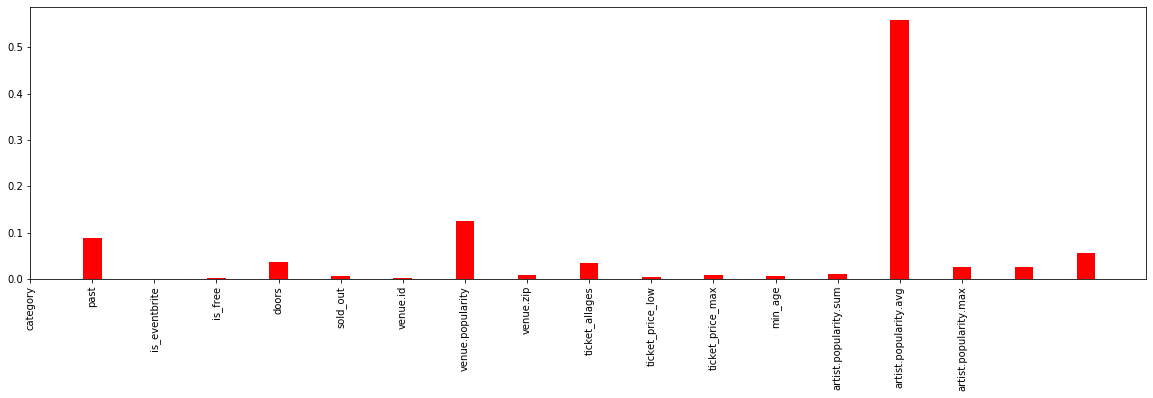

In [33]:
# Take a look at feature importance
f_importance = pd.DataFrame({'feature':udf2.columns, 'importance':RF_model2.feature_importances_})
#plot histogram
lenc = len(udf2.columns)
x_tick_label=[None]*lenc
hist_val=np.zeros(lenc)
for i in range(0,lenc):
    hist_val[i] = f_importance.values[i][1]
    x_tick_label[i] = f_importance.values[i][0]
    print(x_tick_label[i],hist_val[i])
    
index = np.arange(lenc)+2
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(index,hist_val, .3, color='r')
ax.set_xticks(range(1, lenc, 1))
ax.set_xticklabels(x_tick_label, rotation='vertical')
plt.show()

In [7]:
# enforce Keras run CPU
import tensorflow as tf
from keras import backend as K

num_cores = 2

if GPU:
    num_GPU = 1
    num_CPU = 1
if CPU:
    num_CPU = 1
    num_GPU = 0

config = tf.ConfigProto(intra_op_parallelism_threads=num_cores,
                        inter_op_parallelism_threads=num_cores, 
                        allow_soft_placement=True,
                        device_count = {'CPU' : num_CPU,
                                        'GPU' : num_GPU}
                       )

session = tf.Session(config=config)
K.set_session(session)

Using Theano backend.


NameError: name 'GPU' is not defined

In [145]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40703 entries, 11049447 to 9968570
Data columns (total 23 columns):
category                 40703 non-null int64
past                     40703 non-null int32
votes                    40703 non-null int64
is_eventbrite            40703 non-null int32
is_free                  40703 non-null int32
doors                    40703 non-null int32
sold_out                 40703 non-null int32
venue.id                 40703 non-null int64
venue.popularity         40703 non-null float64
venue.zip                40703 non-null int64
ticket_allages           40703 non-null int32
ticket_price_low         40703 non-null float64
ticket_price_max         40703 non-null float64
min_age                  40703 non-null int32
artist.popularity.sum    40703 non-null float64
artist.popularity.avg    40703 non-null float64
artist.popularity.max    40703 non-null float64
dow                      40703 non-null int64
doy                      40703 non-null in

In [146]:
### first validate that the NN works
# use sklearn internal dataset
from sklearn.datasets import load_diabetes

In [147]:

# first neural network with keras tutorial
from keras.models import Sequential
from keras.layers import Dense

In [154]:
## testing NN
data=load_diabetes()

In [158]:
data.data.shape

(442, 10)

In [160]:
data.target.shape

(442,)

In [161]:
X=data.data
y=data.target

In [171]:
from sklearn.preprocessing import MinMaxScaler
# scale regression dataset
scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)

In [172]:
## start Modeling trail
## bechmark model metric setup
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)



In [181]:
nfeature=10

In [192]:
Nmodel=Sequential()
Nmodel.add(Dense(nfeature+5,input_dim=nfeature, activation='relu'))
Nmodel.add(Dense(nfeature, activation='relu'))
Nmodel.add(Dense(nfeature-5, activation='relu'))
Nmodel.add(Dense(1, activation='linear'))

In [193]:
Nmodel.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [194]:
Nmodel.fit(X_train,y_train,epochs=50, batch_size=10)

Epoch 1/50
309/309 [==============================] - 0s 42us/step - loss: 152.5200 - mean_absolute_error: 152.5200
Epoch 2/50
309/309 [==============================] - 0s 39us/step - loss: 152.1949 - mean_absolute_error: 152.1949
Epoch 3/50
309/309 [==============================] - 0s 53us/step - loss: 151.6306 - mean_absolute_error: 151.6306
Epoch 4/50
309/309 [==============================] - 0s 59us/step - loss: 150.2941 - mean_absolute_error: 150.2941
Epoch 5/50
309/309 [==============================] - 0s 39us/step - loss: 146.6777 - mean_absolute_error: 146.6777
Epoch 6/50
309/309 [==============================] - 0s 32us/step - loss: 138.3754 - mean_absolute_error: 138.3754
Epoch 7/50
309/309 [==============================] - 0s 29us/step - loss: 122.5801 - mean_absolute_error: 122.5801
Epoch 8/50
309/309 [==============================] - 0s 34us/step - loss: 96.7111 - mean_absolute_error: 96.7111
Epoch 9/50
309/309 [==============================] - 0s 64us/step - loss:

In [195]:
pred_train_NN = Nmodel.predict(X_train)
pred_test_NN = Nmodel.predict(X_test)

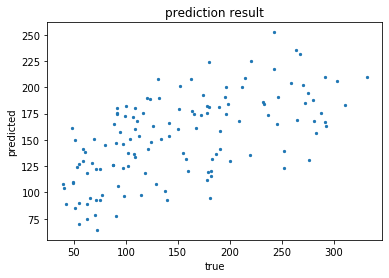

In [197]:
plt.scatter(y_test,pred_test_NN, s=5)
plt.title('prediction result')
plt.xlabel('true')
plt.ylabel('predicted')
#plt.xlim([-100,2500])
plt.show()

In [205]:
nfeature=len(udf2.columns)
print(nfeature)

17


In [206]:
## redo train-test
X_train, X_test, y_train, y_test = train_test_split(udf2, udf2_y, test_size=0.3, random_state=12)


In [207]:
Nmodel=Sequential()
Nmodel.add(Dense(nfeature+8,input_dim=nfeature, activation='relu'))
Nmodel.add(Dense(nfeature, activation='relu'))
Nmodel.add(Dense(nfeature-12, activation='relu'))
Nmodel.add(Dense(1, activation='linear'))

In [208]:
Nmodel.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [209]:
Nmodel.fit(X_train,y_train,epochs=20, batch_size=10)

Epoch 1/20
29305/29305 [==============================] - 3s 97us/step - loss: 79.5364 - mean_absolute_error: 79.5364
Epoch 2/20
29305/29305 [==============================] - 3s 86us/step - loss: 19.4482 - mean_absolute_error: 19.4482
Epoch 3/20
29305/29305 [==============================] - 2s 73us/step - loss: 16.8830 - mean_absolute_error: 16.8830
Epoch 4/20
29305/29305 [==============================] - 2s 81us/step - loss: 16.9588 - mean_absolute_error: 16.9588
Epoch 5/20
29305/29305 [==============================] - 3s 86us/step - loss: 17.0713 - mean_absolute_error: 17.0713
Epoch 6/20
29305/29305 [==============================] - 2s 72us/step - loss: 16.8318 - mean_absolute_error: 16.8318
Epoch 7/20
29305/29305 [==============================] - 2s 67us/step - loss: 16.7831 - mean_absolute_error: 16.7831
Epoch 8/20
29305/29305 [==============================] - 2s 83us/step - loss: 23.5365 - mean_absolute_error: 23.5365
Epoch 9/20
29305/29305 [==============================] 

In [210]:
pred_train_NN = Nmodel.predict(X_train)
pred_test_NN = Nmodel.predict(X_test)

In [211]:
# access several benchmark RMSE for reference:
print('MSE score(training):',metrics.mean_squared_error(y_train, pred_train_NN))
print('MAE score(training):',metrics.mean_absolute_error(y_train, pred_train_NN))
print('MSE score:',metrics.mean_squared_error(y_test, pred_test_NN))
print('MAE score:',metrics.mean_absolute_error(y_test, pred_test_NN))

MSE score(training): 22678.891184664368
MAE score(training): 16.888520898348723
MSE score: 27963.010259604973
MAE score: 18.571081594733677


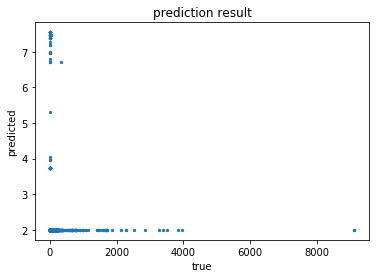

In [212]:
plt.scatter(y_test,pred_test_NN, s=5)
plt.title('prediction result')
plt.xlabel('true')
plt.ylabel('predicted')
#plt.xlim([-100,2500])
plt.show()

In [215]:
Nmodel3=Sequential()
Nmodel3.add(Dense(nfeature+8, input_dim=nfeature, activation='relu'))
Nmodel3.add(Dense(nfeature, activation='relu'))
Nmodel3.add(Dense(nfeature-12, activation='relu'))
Nmodel3.add(Dense(1, activation='linear'))

In [216]:
Nmodel3.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [85]:
X_train.head()

,category,past,is_eventbrite,is_free,doors,sold_out,venue.id,venue.popularity,venue.zip,ticket_allages,...,min_age,artist.popularity.sum,artist.popularity.avg,artist.popularity.max,dow,doy,month,day,hour,venue.tol_num_events
id,,,,,,,,,,,,,,,,,,,,,
10499171,0,1,0,0,1,0,251731,15.0,78701,0,...,0,6.0,1.0,1.0,3,73,3,14,19,405
10108239,2,1,0,0,0,0,268909,1.0,78704,0,...,21,0.0,0.0,0.0,5,321,11,17,14,213
10630753,11,1,0,0,0,0,377356,1.0,78745,0,...,0,0.0,0.0,0.0,5,131,5,11,18,40
10191244,4,1,0,0,0,0,1607,5.0,78701,0,...,0,0.0,0.0,0.0,3,24,1,24,19,608
10758130,0,1,0,0,1,0,13466,10.0,0,0,...,21,12.0,3.0,3.0,4,158,6,7,21,197


In [217]:
Nmodel3.fit(X_train,y_train,epochs=30, batch_size=10)

Epoch 1/30
29305/29305 [==============================] - 2s 68us/step - loss: 54.9533 - mean_absolute_error: 54.9533
Epoch 2/30
29305/29305 [==============================] - 2s 65us/step - loss: 16.8133 - mean_absolute_error: 16.8133
Epoch 3/30
29305/29305 [==============================] - 2s 64us/step - loss: 16.6587 - mean_absolute_error: 16.6587
Epoch 4/30
29305/29305 [==============================] - 2s 67us/step - loss: 16.6784 - mean_absolute_error: 16.6784
Epoch 5/30
29305/29305 [==============================] - 2s 68us/step - loss: 16.8971 - mean_absolute_error: 16.8971
Epoch 6/30
29305/29305 [==============================] - 2s 85us/step - loss: 16.9006 - mean_absolute_error: 16.9006
Epoch 7/30
29305/29305 [==============================] - 2s 76us/step - loss: 16.9092 - mean_absolute_error: 16.9092
Epoch 8/30
29305/29305 [==============================] - 2s 69us/step - loss: 16.8966 - mean_absolute_error: 16.8966
Epoch 9/30
29305/29305 [==============================] 

In [218]:
pred_train_NN3 = Nmodel3.predict(X_train)
pred_test_NN3 = Nmodel3.predict(X_test)

In [219]:
# access several benchmark RMSE for reference:
print('MSE score(training):',metrics.mean_squared_error(y_train, pred_train_NN3))
print('MAE score(training):',metrics.mean_absolute_error(y_train, pred_train_NN3))
print('MSE score:',metrics.mean_squared_error(y_test, pred_test_NN3))
print('MAE score:',metrics.mean_absolute_error(y_test, pred_test_NN3))

MSE score(training): 22679.440890541013
MAE score(training): 16.887586267033935
MSE score: 27963.102493616578
MAE score: 18.56704384144514


In [220]:
# test on scaling the input features
scalar = MinMaxScaler()
scalar.fit(udf2)
X = scalar.transform(udf2)

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, udf2_y, test_size=0.3, random_state=12)

In [223]:
X.shape[1]

17

In [227]:
nfeature = X.shape[1]
Nmodel2=Sequential()
Nmodel2.add(Dense(nfeature+8,input_dim=nfeature, activation='relu'))
Nmodel2.add(Dense(nfeature, activation='relu'))
Nmodel2.add(Dense(nfeature-12, activation='relu'))
Nmodel2.add(Dense(1, activation='linear'))

In [228]:
Nmodel2.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [229]:
Nmodel2.fit(X_train,y_train,epochs=80, batch_size=10)

Epoch 1/80
29305/29305 [==============================] - 1s 48us/step - loss: 16.2821 - mean_absolute_error: 16.2821
Epoch 2/80
29305/29305 [==============================] - 2s 56us/step - loss: 15.9594 - mean_absolute_error: 15.9594
Epoch 3/80
29305/29305 [==============================] - 2s 53us/step - loss: 15.7840 - mean_absolute_error: 15.7840
Epoch 4/80
29305/29305 [==============================] - 2s 51us/step - loss: 15.6868 - mean_absolute_error: 15.6868
Epoch 5/80
29305/29305 [==============================] - 1s 49us/step - loss: 15.6455 - mean_absolute_error: 15.6455
Epoch 6/80
29305/29305 [==============================] - 2s 65us/step - loss: 15.6112 - mean_absolute_error: 15.6112
Epoch 7/80
29305/29305 [==============================] - 2s 54us/step - loss: 15.5846 - mean_absolute_error: 15.5846
Epoch 8/80
29305/29305 [==============================] - 1s 49us/step - loss: 15.5498 - mean_absolute_error: 15.5498
Epoch 9/80
29305/29305 [==============================] 

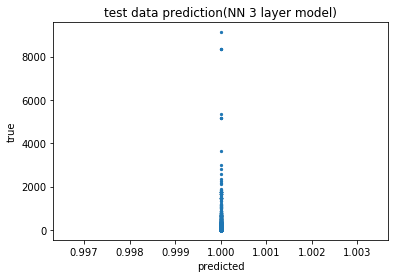

In [84]:
# plot the predictions
plt.scatter(pred_train_NN3,y_train, s=5)
plt.title('test data prediction(NN 3 layer model)')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

In [83]:
pred_test_NN3[0:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [32]:
Nmodel2=Sequential()
Nmodel2.add(Dense(22, input_dim=17, activation='relu'))
Nmodel2.add(Dense(17, activation='relu'))
Nmodel2.add(Dense(1, activation='sigmoid'))

In [33]:
Nmodel2.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [34]:
Nmodel2.fit(X_train,y_train,epochs=100, batch_size=10)

Epoch 1/100
29305/29305 [==============================] - 1s 30us/step - loss: 17.1148 - mean_absolute_error: 17.1148
Epoch 2/100
29305/29305 [==============================] - 1s 38us/step - loss: 17.1060 - mean_absolute_error: 17.1060
Epoch 3/100
29305/29305 [==============================] - 1s 29us/step - loss: 17.1059 - mean_absolute_error: 17.1059
Epoch 4/100
29305/29305 [==============================] - 1s 34us/step - loss: 17.1059 - mean_absolute_error: 17.1059
Epoch 5/100
29305/29305 [==============================] - 1s 30us/step - loss: 17.1059 - mean_absolute_error: 17.1059
Epoch 6/100
29305/29305 [==============================] - 1s 37us/step - loss: 17.1059 - mean_absolute_error: 17.1059
Epoch 7/100
29305/29305 [==============================] - 1s 29us/step - loss: 17.1059 - mean_absolute_error: 17.1059
Epoch 8/100
29305/29305 [==============================] - 1s 41us/step - loss: 17.1059 - mean_absolute_error: 17.1059
Epoch 9/100
29305/29305 [=======================

In [37]:
pred_train_NN2 = Nmodel2.predict(X_train)
pred_test_NN2 = Nmodel2.predict(X_test)

In [38]:
# access several benchmark RMSE for reference:
print('MSE score(training):',metrics.mean_squared_error(y_train, pred_train_NN2))
print('MAE score(training):',metrics.mean_absolute_error(y_train, pred_train_NN2))
print('MSE score:',metrics.mean_squared_error(y_test, pred_test_NN2))
print('MAE score:',metrics.mean_absolute_error(y_test, pred_test_NN2))

MSE score(training): 22712.22409145197
MAE score(training): 17.105920491383724
MSE score: 27999.19060509554
MAE score: 18.779458598726116
